In [1]:
%pip install tensorflow

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     --------------------------------- ---- 41.0/46.2 kB 960.0 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 382.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB 3.3 MB/s eta 0:01:55
   ---------------------------------------- 0.3/377.0 MB 2.6 MB/s eta 0:02:25
   ---------------------------------------- 0.4/377.0 MB 2.7 MB/s eta 0:02:21
   ---------------------------------------- 0.6/377.0 MB 3.2 MB/s eta 0:02:00
   ---------------------------------------- 0.7/377.0 MB 3.2 MB/s eta 0:01:57
   ---------------------------------------- 0.9/377.0 MB 3.2 MB/s eta 0:01:58
   ---------------------------------------- 1.1/377.0 MB 3.4 MB/s eta 0:01:52
   ---------------------------------------- 1.3/3

In [3]:
import numpy as np
import pandas as pd 
import tensorflow as tf 
from tensorflow.keras import layers
from matplotlib import pyplot as plt
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
np.set_printoptions(linewidth = 200)

In [4]:
(x_train , y_train),(x_test , y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
x_train[2800]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 102, 254, 204,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 183, 253, 160,   0,   0,   0,   0,   0

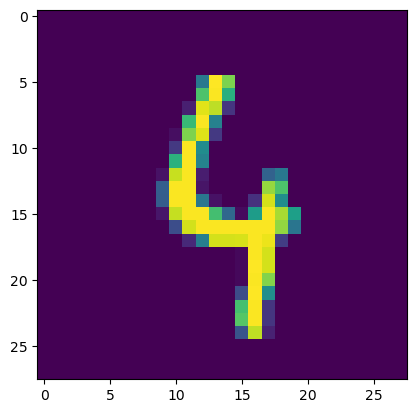

In [6]:
#this cell code shall use colours for array visualization 
plt.imshow(x_train[2800])

In [7]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2800][10])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.16470588 0.99215686 0.48627451 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


In [14]:
def plot_curve(epochs, hist, list_of_metrics):
  
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()
    
print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [17]:
def create_model(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
  model.add(tf.keras.layers.Dense(units=256, activation='relu'))
  model.add(tf.keras.layers.Dense(units=128 , activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.4))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.7094 - loss: 0.9372 - val_accuracy: 0.9437 - val_loss: 0.1915
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9370 - loss: 0.2080 - val_accuracy: 0.9608 - val_loss: 0.1321
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9612 - loss: 0.1361 - val_accuracy: 0.9669 - val_loss: 0.1161
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9669 - loss: 0.1074 - val_accuracy: 0.9703 - val_loss: 0.0976
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9760 - loss: 0.0815 - val_accuracy: 0.9738 - val_loss: 0.0897
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9811 - loss: 0.0611 - val_accuracy: 0.9740 - val_loss: 0.0857
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9845 - loss: 0.0503 - val_accuracy: 0.9753 - val_loss: 0.0832
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9887 - loss: 0.0392 - val_accuracy: 0.9773 - v

[0.10355618596076965, 0.9821000099182129]

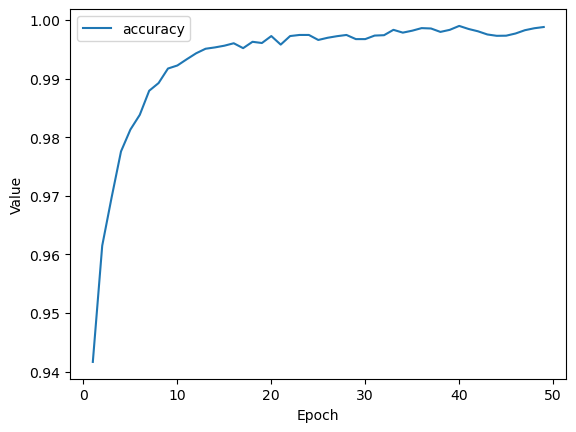

In [18]:
learning_rate = 0.003
epochs = 50
batch_size = 1000
validation_split = 0.2
my_model = create_model(learning_rate)
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)